# ipfjes monthly monitoring part 1

In [1]:
import pandas as pd
import psycopg2 as pg
import pandas.io.sql as psql
import datetime 
%matplotlib inline

In [2]:
# todo automate all inc db prep bit and https://stackoverflow.com/questions/33181846/programmatically-convert-pandas-dataframe-to-markdown-table
# need to update to not count participants that don't want to interview?

In [3]:
conn = pg.connect("dbname='carlplaying' user='drcjar' password='drcjar_is_not_fake'")

In [4]:
df = psql.read_sql("SELECT * FROM ipfjes_demographics", conn)

In [5]:
df = df[df.updated.notnull()]

In [6]:
df.updated.max()

datetime.datetime(2019, 9, 23, 15, 0, 1, 552137, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=60, name=None))

In [7]:
t = df.updated.dropna().max() # date of most recent record in db

In [8]:
df[~df.hospital_number.str.upper().str.contains('TEST')].hospital_number.str[:2].value_counts()[:21].reset_index()

,index,hospital_number
0,04,109
1,10,106
2,01,89
3,08,84
4,06,80
5,03,80
6,05,74
7,20,64
8,09,64
9,16,42


In [9]:
lookup = pd.read_csv('https://raw.githubusercontent.com/drcjar/ipfjes/master/docs/ipfjes-centre-ids.csv')
centre_stats = df[~df.hospital_number.str.upper().str.contains('TEST')].hospital_number.str[:2].value_counts()[:21].reset_index()
centre_stats.columns = ['Centre ID', 'Participants Recruited']
centre_stats['Centre ID'] = centre_stats['Centre ID'].astype(int)
centre_stats = pd.merge(centre_stats, lookup, on='Centre ID')
centre_stats = centre_stats[['Principal Investigator', 'Organisation', 'Participants Recruited']]

In [10]:
start_date = datetime.date(2017, 6, 1)
end_date = datetime.date(2019, 8, 1)
elapsed = (datetime.date.today() - start_date).days
remaining = (end_date - datetime.date.today()).days

print('centre stats as of {}'.format(t.strftime('%d-%m-%y')))
recruited = centre_stats['Participants Recruited'].sum()
print('{} enrolled in {} days ({:.0f}/week) \n{} in {} \
days to go ({:.0f}/week)'.format(recruited, elapsed, (recruited/elapsed*7),
                                (920 - recruited), remaining, (920 - recruited)/remaining*7))
centre_stats

centre stats as of 23-09-19
1032 enrolled in 845 days (9/week) 
-112 in -54 days to go (15/week)


,Principal Investigator,Organisation,Participants Recruited
0,Sophie Fletcher,Southampton University Hospitals NHS Trust,109
1,Carl Reynolds,Imperial College Healthcare NHS Trust,106
2,Gareth Walters,Heart of England NHS Foundation Trust,89
3,Lisa Spencer,Aintree University Hospitals NHS Foundation Trust,84
4,Helen Parfrey,Papworth Hospital NHS Foundation Trust,80
5,Gauri Saini,Nottingham University Hospitals NHS Trust,80
6,Nazia Chaudhuri,University Hospital of South Manchester,74
7,Alex West,Guys’ and St Thomas’ NHS Foundation Trust,64
8,Huzaifa Adamali,North Bristol NHS Trust,64
9,Paul Beirne,Leeds Teaching Hospitals NHS Trust,42


In [11]:
len(centre_stats)

21

In [12]:
lookup[~lookup.Organisation.isin(centre_stats.Organisation)]

,Principal Investigator,Organisation,Centre ID


In [13]:
centre_stats.to_csv('ipfjes-recruitment-{}.csv'.format(t.strftime('%d-%m-%y')), index=False)

In [14]:
df.updated = pd.to_datetime(df.updated, utc=True)

In [15]:
df.index = df.updated

In [16]:
df.resample('M').hospital_number.count()

updated
2017-07-31 00:00:00+00:00      5
2017-08-31 00:00:00+00:00     21
2017-09-30 00:00:00+00:00     21
2017-10-31 00:00:00+00:00     19
2017-11-30 00:00:00+00:00     35
2017-12-31 00:00:00+00:00     28
2018-01-31 00:00:00+00:00     38
2018-02-28 00:00:00+00:00     31
2018-03-31 00:00:00+00:00     34
2018-04-30 00:00:00+00:00     87
2018-05-31 00:00:00+00:00     27
2018-06-30 00:00:00+00:00     32
2018-07-31 00:00:00+00:00    136
2018-08-31 00:00:00+00:00     49
2018-09-30 00:00:00+00:00     41
2018-10-31 00:00:00+00:00     65
2018-11-30 00:00:00+00:00     50
2018-12-31 00:00:00+00:00     22
2019-01-31 00:00:00+00:00     34
2019-02-28 00:00:00+00:00     22
2019-03-31 00:00:00+00:00     26
2019-04-30 00:00:00+00:00     15
2019-05-31 00:00:00+00:00     51
2019-06-30 00:00:00+00:00     35
2019-07-31 00:00:00+00:00     46
2019-08-31 00:00:00+00:00     33
2019-09-30 00:00:00+00:00     29
Freq: M, Name: hospital_number, dtype: int64

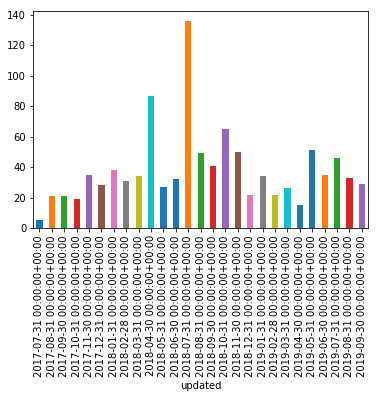

In [17]:
df.resample('M').hospital_number.count().plot(kind='bar')

In [18]:
df.hospital_number.nunique()

1032